### Understanding the Share price of Oil companies ##
Trying to analyse the market prices of oil company using regression models like decision trees and random forests. To do this, I'm using historical prices of other oil companies and the price of crude oil as my independent variables. The process includes data collection, cleaning, feature selection, model training, and evaluation. However, I'm aware that predicting market prices is challenging due to many factors at play, so I'm treating my models as tools for understanding the market rather than precise predictions.

In [5]:
# Start loading libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import yfinance as yf

In [6]:
# Extracting the crude Price
crude = pd.read_excel("C:/Users/Poonkundran K/Downloads/RBRTEd.xls")

In [7]:
# Filtering the crude price from 2010
crude = crude[crude['Date'] >= '2010-01-01']

In [8]:
# Viewing the crude price
crude

,Date,Spot Price
5751,2010-01-04,79.05
5752,2010-01-05,79.27
5753,2010-01-06,80.14
5754,2010-01-07,80.57
5755,2010-01-08,80.06
...,...,...
9225,2023-09-26,94.46
9226,2023-09-27,97.10
9227,2023-09-28,96.64
9228,2023-09-29,95.86


In [9]:
# Oil companies ticker
shares = ['RELIANCE','ONGC','IOC','BPCL','GAIL','HINDPETRO']

In [10]:
# Creating a dictionary to store the data 
df = {}

In [11]:
# Downloading the data 
for share in shares:
    df[share] = yf.download(share+'.NS',start = '2010-01-01', end = '2023-06-20')
    df[share] = df[share].reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
# Viewing the data
df['RELIANCE']

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,540.427307,540.427307,506.127411,532.700500,481.112946,35372156
1,2010-01-05,569.551208,569.551208,527.697937,530.323059,478.965759,9872785
2,2010-01-06,534.879883,542.111328,530.298279,538.891846,486.704742,10933743
3,2010-01-07,538.891846,552.265076,533.938782,547.832092,494.779144,12090336
4,2010-01-08,548.797974,551.670715,542.854309,546.395691,493.481934,6973331
...,...,...,...,...,...,...,...
3318,2023-06-13,2495.000000,2523.449951,2486.250000,2520.850098,2511.976562,5190958
3319,2023-06-14,2521.000000,2555.000000,2517.000000,2551.850098,2542.867676,6127509
3320,2023-06-15,2551.800049,2562.550049,2535.500000,2552.550049,2543.564941,5451926
3321,2023-06-16,2560.199951,2582.399902,2560.199951,2577.399902,2568.327393,11155180


In [ ]:
# combining the share price and crude price in one data frame 

In [13]:
Date = df['RELIANCE']['Date'].to_frame()

In [14]:
Date

,Date
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3318,2023-06-13
3319,2023-06-14
3320,2023-06-15
3321,2023-06-16


In [16]:
crude = pd.merge(Date, crude , on='Date', how='inner')

In [17]:
crude

,Date,Spot Price
0,2010-01-04,79.05
1,2010-01-05,79.27
2,2010-01-06,80.14
3,2010-01-07,80.57
4,2010-01-08,80.06
...,...,...
3235,2023-06-13,74.24
3236,2023-06-14,73.39
3237,2023-06-15,75.75
3238,2023-06-16,76.76


In [18]:
for share in shares:
    crude[share] = df[share][['Adj Close']]

In [19]:
crude

,Date,Spot Price,RELIANCE,ONGC,IOC,BPCL,GAIL,HINDPETRO
0,2010-01-04,79.05,481.112946,111.416557,27.112146,60.205948,51.901688,45.779350
1,2010-01-05,79.27,478.965759,113.368156,27.215544,59.299263,52.358120,45.807980
2,2010-01-06,80.14,486.704742,114.799065,27.176777,58.406483,52.007980,44.651321
3,2010-01-07,80.57,494.779144,114.921028,26.750246,57.273129,53.314739,44.559727
4,2010-01-08,80.06,493.481934,114.067207,27.206924,58.244564,53.614868,45.086506
...,...,...,...,...,...,...,...,...
3235,2023-06-13,74.24,2343.671143,139.783737,76.838745,330.513824,92.310020,231.850006
3236,2023-06-14,73.39,2347.756836,142.017944,77.178093,330.019348,92.358192,232.050003
3237,2023-06-15,75.75,2328.424805,142.503647,77.372009,330.316010,92.358192,232.800003
3238,2023-06-16,76.76,2315.171875,143.912155,77.081139,331.206085,92.261841,231.199997


In [20]:
crude.dropna

<bound method DataFrame.dropna of            Date  Spot Price     RELIANCE        ONGC        IOC        BPCL  \
0    2010-01-04       79.05   481.112946  111.416557  27.112146   60.205948   
1    2010-01-05       79.27   478.965759  113.368156  27.215544   59.299263   
2    2010-01-06       80.14   486.704742  114.799065  27.176777   58.406483   
3    2010-01-07       80.57   494.779144  114.921028  26.750246   57.273129   
4    2010-01-08       80.06   493.481934  114.067207  27.206924   58.244564   
...         ...         ...          ...         ...        ...         ...   
3235 2023-06-13       74.24  2343.671143  139.783737  76.838745  330.513824   
3236 2023-06-14       73.39  2347.756836  142.017944  77.178093  330.019348   
3237 2023-06-15       75.75  2328.424805  142.503647  77.372009  330.316010   
3238 2023-06-16       76.76  2315.171875  143.912155  77.081139  331.206085   
3239 2023-06-19       76.09  2369.729248  144.203583  76.741783  327.497437   

           GAIL  

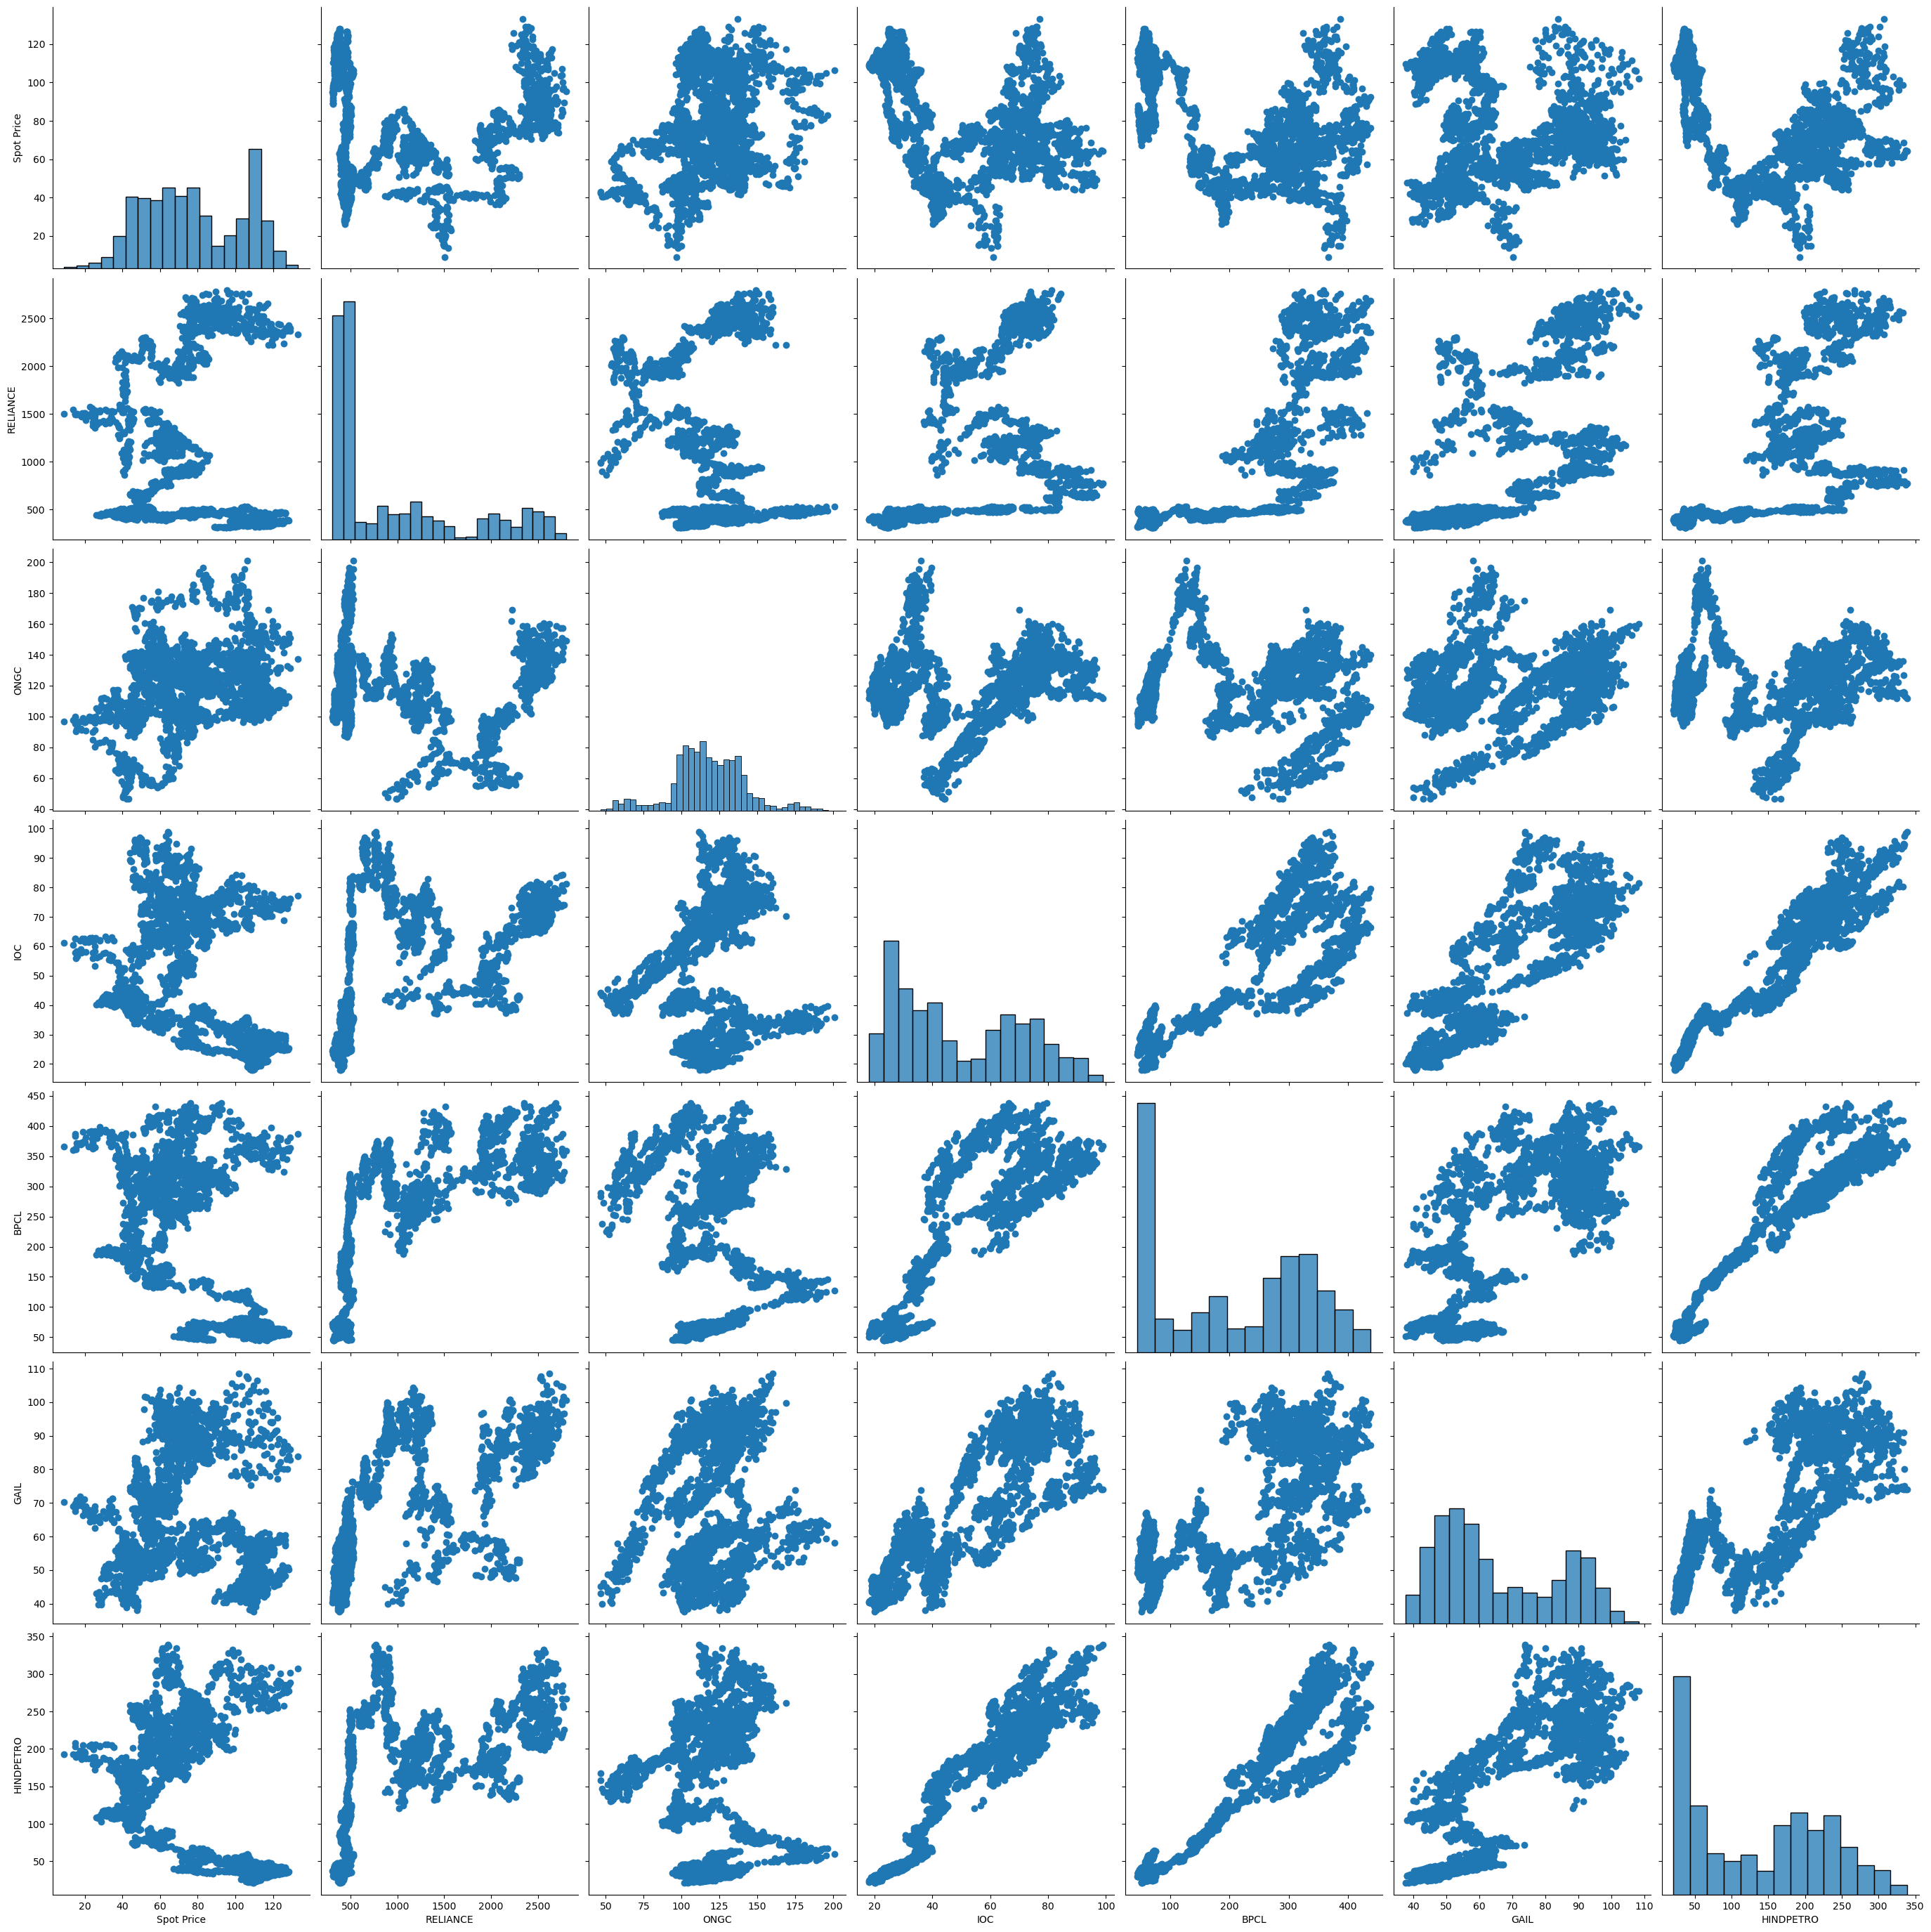

In [21]:
palette=sns.cubehelix_palette(18, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(crude,palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))

In [22]:
crude

,Date,Spot Price,RELIANCE,ONGC,IOC,BPCL,GAIL,HINDPETRO
0,2010-01-04,79.05,481.112946,111.416557,27.112146,60.205948,51.901688,45.779350
1,2010-01-05,79.27,478.965759,113.368156,27.215544,59.299263,52.358120,45.807980
2,2010-01-06,80.14,486.704742,114.799065,27.176777,58.406483,52.007980,44.651321
3,2010-01-07,80.57,494.779144,114.921028,26.750246,57.273129,53.314739,44.559727
4,2010-01-08,80.06,493.481934,114.067207,27.206924,58.244564,53.614868,45.086506
...,...,...,...,...,...,...,...,...
3235,2023-06-13,74.24,2343.671143,139.783737,76.838745,330.513824,92.310020,231.850006
3236,2023-06-14,73.39,2347.756836,142.017944,77.178093,330.019348,92.358192,232.050003
3237,2023-06-15,75.75,2328.424805,142.503647,77.372009,330.316010,92.358192,232.800003
3238,2023-06-16,76.76,2315.171875,143.912155,77.081139,331.206085,92.261841,231.199997


In [23]:
crude.rename(columns = {'Spot Price': 'CRUDE'}, inplace = True)

In [24]:
crude

,Date,CRUDE,RELIANCE,ONGC,IOC,BPCL,GAIL,HINDPETRO
0,2010-01-04,79.05,481.112946,111.416557,27.112146,60.205948,51.901688,45.779350
1,2010-01-05,79.27,478.965759,113.368156,27.215544,59.299263,52.358120,45.807980
2,2010-01-06,80.14,486.704742,114.799065,27.176777,58.406483,52.007980,44.651321
3,2010-01-07,80.57,494.779144,114.921028,26.750246,57.273129,53.314739,44.559727
4,2010-01-08,80.06,493.481934,114.067207,27.206924,58.244564,53.614868,45.086506
...,...,...,...,...,...,...,...,...
3235,2023-06-13,74.24,2343.671143,139.783737,76.838745,330.513824,92.310020,231.850006
3236,2023-06-14,73.39,2347.756836,142.017944,77.178093,330.019348,92.358192,232.050003
3237,2023-06-15,75.75,2328.424805,142.503647,77.372009,330.316010,92.358192,232.800003
3238,2023-06-16,76.76,2315.171875,143.912155,77.081139,331.206085,92.261841,231.199997


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [26]:
# Define features and target variable
X = crude[['CRUDE','RELIANCE', 'ONGC', 'BPCL', 'GAIL', 'HINDPETRO']]
y = crude['IOC']  # Change the target variable to 'IOC'

In [27]:
# Create a TimeSeriesSplit object with a specified number of splits
n_splits = 5  # You can adjust the number of splits
tscv = TimeSeriesSplit(n_splits=n_splits)

In [28]:
# Split the data using time-based cross-validation
for train_index, test_index in tscv.split(crude):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [29]:
# Create and train the decision tree regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
# Make predictions
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 110.57679007638772


In [32]:
y_test

2700    49.725864
2701    49.338188
2702    49.803398
2703    49.312344
2704    48.562836
          ...    
3235    76.838745
3236    77.178093
3237    77.372009
3238    77.081139
3239    76.741783
Name: IOC, Length: 540, dtype: float64

In [33]:
X_test

,CRUDE,RELIANCE,ONGC,BPCL,GAIL,HINDPETRO
2700,64.00,1971.990723,84.721649,339.188477,72.310616,184.408478
2701,63.89,1955.204956,83.845207,333.457947,72.195335,182.594223
2702,59.96,1957.383667,85.890221,334.294525,71.705399,185.940521
2703,63.70,1966.345825,84.721649,330.780884,71.417183,182.191055
2704,61.21,1972.238281,82.634903,329.484222,72.080048,180.941238
...,...,...,...,...,...,...
3235,74.24,2343.671143,139.783737,330.513824,92.310020,231.850006
3236,73.39,2347.756836,142.017944,330.019348,92.358192,232.050003
3237,75.75,2328.424805,142.503647,330.316010,92.358192,232.800003
3238,76.76,2315.171875,143.912155,331.206085,92.261841,231.199997


In [34]:
# Creating a data frame so that it will be easy for us to visualise the result 
y_t = pd.DataFrame(y_test)

In [35]:
dates = y_t.index.to_list()
dates

[2700,
 2701,
 2702,
 2703,
 2704,
 2705,
 2706,
 2707,
 2708,
 2709,
 2710,
 2711,
 2712,
 2713,
 2714,
 2715,
 2716,
 2717,
 2718,
 2719,
 2720,
 2721,
 2722,
 2723,
 2724,
 2725,
 2726,
 2727,
 2728,
 2729,
 2730,
 2731,
 2732,
 2733,
 2734,
 2735,
 2736,
 2737,
 2738,
 2739,
 2740,
 2741,
 2742,
 2743,
 2744,
 2745,
 2746,
 2747,
 2748,
 2749,
 2750,
 2751,
 2752,
 2753,
 2754,
 2755,
 2756,
 2757,
 2758,
 2759,
 2760,
 2761,
 2762,
 2763,
 2764,
 2765,
 2766,
 2767,
 2768,
 2769,
 2770,
 2771,
 2772,
 2773,
 2774,
 2775,
 2776,
 2777,
 2778,
 2779,
 2780,
 2781,
 2782,
 2783,
 2784,
 2785,
 2786,
 2787,
 2788,
 2789,
 2790,
 2791,
 2792,
 2793,
 2794,
 2795,
 2796,
 2797,
 2798,
 2799,
 2800,
 2801,
 2802,
 2803,
 2804,
 2805,
 2806,
 2807,
 2808,
 2809,
 2810,
 2811,
 2812,
 2813,
 2814,
 2815,
 2816,
 2817,
 2818,
 2819,
 2820,
 2821,
 2822,
 2823,
 2824,
 2825,
 2826,
 2827,
 2828,
 2829,
 2830,
 2831,
 2832,
 2833,
 2834,
 2835,
 2836,
 2837,
 2838,
 2839,
 2840,
 2841,
 2842,

In [36]:
y_t

,IOC
2700,49.725864
2701,49.338188
2702,49.803398
2703,49.312344
2704,48.562836
...,...
3235,76.838745
3236,77.178093
3237,77.372009
3238,77.081139


In [37]:
actual = y_t['IOC'].to_list()
actual

[49.72586441040039,
 49.33818817138672,
 49.80339813232422,
 49.31234359741211,
 48.562835693359375,
 45.02206802368164,
 45.4614372253418,
 45.564815521240234,
 46.650306701660156,
 47.399810791015625,
 47.14136505126953,
 46.98629379272461,
 47.012142181396484,
 47.29643249511719,
 48.51115036010742,
 48.07178497314453,
 48.64037322998047,
 48.847137451171875,
 49.70001983642578,
 49.62248992919922,
 50.63044357299805,
 52.181148529052734,
 53.344173431396484,
 52.362060546875,
 50.81135559082031,
 50.940582275390625,
 50.81135559082031,
 49.98432159423828,
 49.4674186706543,
 48.30438995361328,
 47.24474334716797,
 47.865020751953125,
 48.201011657714844,
 49.519107818603516,
 51.06980514526367,
 52.6463623046875,
 53.550933837890625,
 52.9306526184082,
 53.80938720703125,
 54.422119140625,
 53.89293670654297,
 53.753684997558594,
 52.97383499145508,
 52.444644927978516,
 53.25234603881836,
 52.91813278198242,
 55.146263122558594,
 54.338565826416016,
 53.28020095825195,
 54.3942680

In [38]:
# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Actual': actual, 'Pred': y_pred})
df

,Date,Actual,Pred
0,2700,49.725864,59.635681
1,2701,49.338188,60.497833
2,2702,49.803398,56.556606
3,2703,49.312344,60.497833
4,2704,48.562836,60.497833
...,...,...,...
535,3235,76.838745,67.493507
536,3236,77.178093,67.493507
537,3237,77.372009,67.493507
538,3238,77.081139,67.493507


In [39]:
# Creating a data frame with historic data 
hist = pd.DataFrame(y_train)
hist = hist.reset_index()
hist

,index,IOC
0,0,27.112146
1,1,27.215544
2,2,27.176777
3,3,26.750246
4,4,27.206924
...,...,...
2695,2695,47.399811
2696,2696,47.063828
2697,2697,48.562836
2698,2698,47.787491


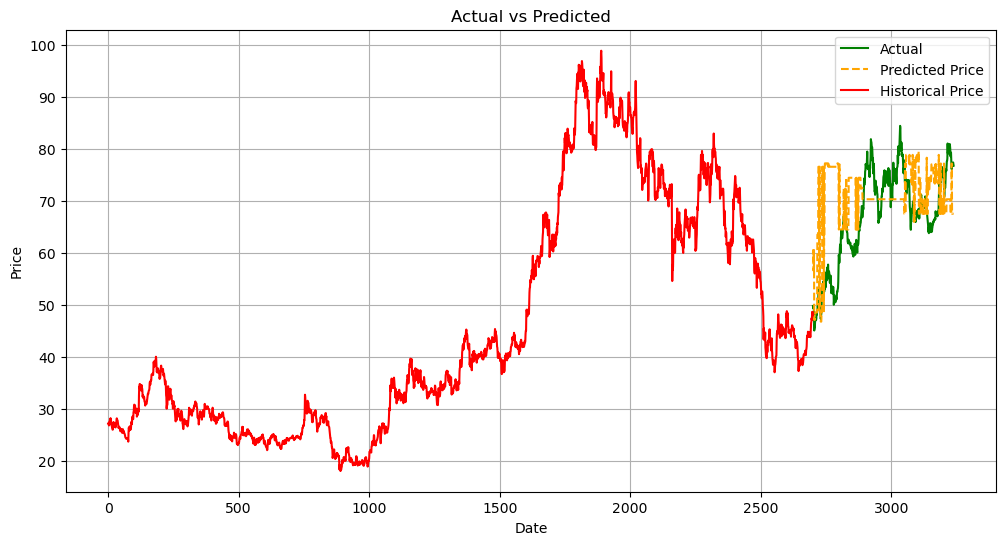

In [40]:
# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual'], label='Actual', linestyle='-', color='green')
plt.plot(df['Date'], df['Pred'], label='Predicted Price', linestyle='--', color='orange')
plt.plot(hist['index'], hist['IOC'], label='Historical Price', linestyle='-', color='red' )

# Customize the plot
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [41]:
## we will try to improve the model 

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [43]:
# Hyperparameter tuning with GridSearchCV for a Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
}


In [44]:
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [45]:
best_rf_model = grid_search.best_estimator_

In [46]:
# Make predictions with the best model
rf_predictions = best_rf_model.predict(X_test)

In [47]:
# Calculate the MSE for the best Random Forest model
best_rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Best Random Forest MSE: {best_rf_mse}")

Best Random Forest MSE: 102.04000685072765


In [49]:
# Including the new prediction in already existing data frame which is having old prediction
df['new_pred'] = rf_predictions

In [50]:
df

,Date,Actual,Pred,new_pred
0,2700,49.725864,59.635681,58.381481
1,2701,49.338188,60.497833,58.238969
2,2702,49.803398,56.556606,58.130158
3,2703,49.312344,60.497833,57.862461
4,2704,48.562836,60.497833,57.292177
...,...,...,...,...
535,3235,76.838745,67.493507,84.021547
536,3236,77.178093,67.493507,84.031137
537,3237,77.372009,67.493507,84.215647
538,3238,77.081139,67.493507,83.938855


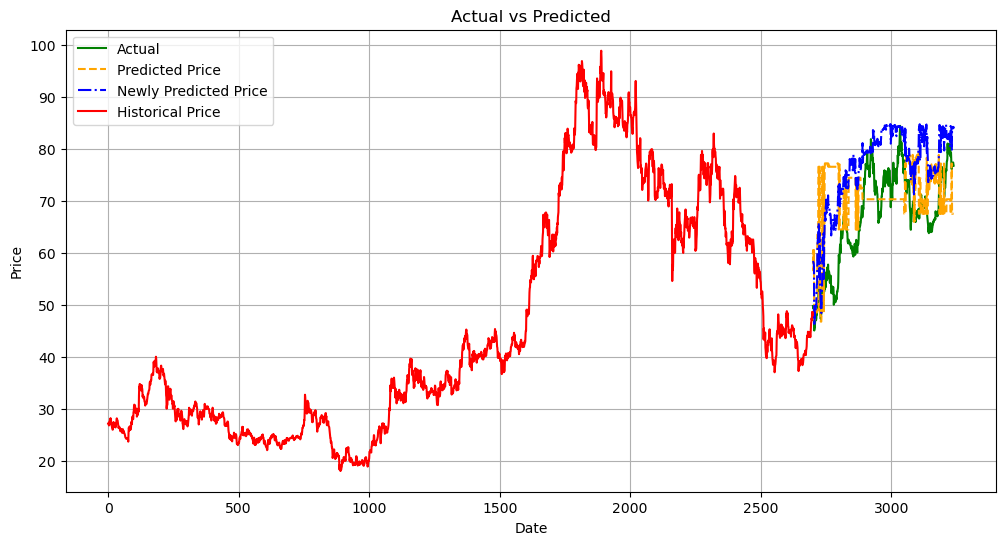

In [51]:
# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual'], label='Actual', linestyle='-', color='green')
plt.plot(df['Date'], df['Pred'], label='Predicted Price', linestyle='--', color='orange')
plt.plot(df['Date'], df['new_pred'], label='Newly Predicted Price', linestyle='-.', color='blue')
plt.plot(hist['index'], hist['IOC'], label='Historical Price', linestyle='-', color='red' )

# Customize the plot
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()